In [70]:
# мипорты
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [71]:
# Создаем папку для графиков, если она не существует
figures_dir = "./figures"
os.makedirs(figures_dir, exist_ok=True)

In [72]:
df = pd.read_csv("./S05-hw-dataset.csv")

df.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [74]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [75]:
df.value_counts(normalize=True)

client_id  age  income  years_employed  credit_score  debt_to_income  num_credit_cards  num_late_payments  has_mortgage  has_car_loan  savings_balance  checking_balance  region_risk_score  phone_calls_to_support_last_3m  active_loans  customer_tenure_years  default
1          25   94074   22              839           0.547339        1                 7                  0             0             26057             5229             0.080052           19                              1             8                      0          0.000333
2004       43   35470   26              538           0.307111        0                 11                 0             1             7070              4144             0.377450           0                               4             5                      1          0.000333
1995       57   106544  25              602           0.362523        4                 0                  1             0             27045             8240             0.326452

# Краткие выводы о датасете:

* ### В датасете 3000 объектов и по 17 признаков у каждого, включая id
* ### Есть аномалии по типу 25 лет от роду, но стаж уже 22 года
* ### Датасет достаточно сбалансированный. Нет сильных перекосов по количеству в группах возраст; стаж; количество кредиток; наличие ипотеки; авто; активных кредитов. 
* ### Преобладают срединие значения в таких колонках как доход; кредитный рейтинг; кредитная нагрузка.


# Для начала надо исправить аномалию с возрастом и стажем

In [76]:
# Находим записи, где стаж больше или равен возрасту (невозможно)
age_vs_experience_anomalies = df[df['years_employed'] >= df['age']]
print(f"   Записей, где стаж >= возрасту: {len(age_vs_experience_anomalies)}")
if len(age_vs_experience_anomalies) > 0:
    print("   Примеры аномалий:")
    print(age_vs_experience_anomalies[['age', 'years_employed']].head())

   Записей, где стаж >= возрасту: 295
   Примеры аномалий:
    age  years_employed
6    25              25
8    30              36
32   25              26
35   24              33
55   23              29


In [77]:
# Создаем копию датасета для обработки
df_clean = df.copy()

# Ограничиваем стаж возрастом - 16 (минимальный возраст начала работы)
df_clean['years_employed_corrected'] = df_clean.apply(
    lambda row: min(row['years_employed'], max(0, row['age'] - 16)),
    axis=1
)

In [78]:
df_clean.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default,years_employed_corrected
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0,9.0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0,26.0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0,37.0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1,26.0
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1,8.0
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0,1.0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0,9.0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0,22.0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1,14.0
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0,9.0


In [79]:
df['years_employed'] = df_clean['years_employed_corrected']
df['years_employed'] = df['years_employed'].astype(int)

In [80]:
df.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,9,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,37,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,26,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,9,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,14,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,9,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


# Теперь можно анализировать дальше

In [81]:
# Выделяем вектор таргета
y = df['default']

# Выделяем матрицу признаков (удаляем 'default' и 'client_id')
X = df.drop(columns=['default', 'client_id'])


In [82]:
# Проверяем типы данных признаков
print("Типы данных признаков:")
print(X.dtypes)

# Проверяем, что все признаки числовые
print("Все признаки числовые:", all(X.dtypes.apply(lambda x: np.issubdtype(x, np.number))))

Типы данных признаков:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object
Все признаки числовые: True


In [83]:
# Проверяем диапазоны некоторых признаков
print(f"debt_to_income: [{X['debt_to_income'].min():.4f}, {X['debt_to_income'].max():.4f}]")
print(f"age: [{X['age'].min()}, {X['age'].max()}]")
print(f"credit_score: [{X['credit_score'].min()}, {X['credit_score'].max()}]")

debt_to_income: [0.0061, 0.8783]
age: [21, 69]
credit_score: [402, 850]


In [84]:
# Базовая информация о размерах
print(f"\nРазмерность X: {X.shape}")
print(f"Размерность y: {y.shape}")


Размерность X: (3000, 15)
Размерность y: (3000,)


In [85]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # сохраняем распределение классов
)

#Размеры выборки
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (2400, 15), y_train: (2400,)
X_test: (600, 15), y_test: (600,)


In [86]:
# Создаем и обучаем бейзлайн-модель
# Используем стратегию "most_frequent" (предсказывает наиболее частый класс)
baseline_model = DummyClassifier(strategy="most_frequent", random_state=42)
baseline_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_baseline = baseline_model.predict(X_test)
y_pred_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]  # вероятности для класса 1

# Вычисляем метрики
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline)

print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"ROC-AUC: {roc_auc_baseline:.4f}")

Accuracy: 0.5900
ROC-AUC: 0.5000


In [87]:
print(f"Наиболее частый класс в обучающих данных: {baseline_model.classes_[0]}")

print(y_train.value_counts(normalize=True))

Наиболее частый класс в обучающих данных: 0
default
0    0.589583
1    0.410417
Name: proportion, dtype: float64


### Эта модель служит точкой отсчёта: любая более сложная модель должна превосходить её
### Если наша модель показывает accuracy ниже 0.59 (то есть если мы всегда будем говорить всегда дефолт), она хуже простого предсказания моды

In [88]:
# Создаем pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

In [89]:
# Определяем сетку параметров для поиска
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # параметр регуляризации
    'logreg__penalty': ['l1', 'l2'],  # тип регуляризации
    'logreg__solver': ['liblinear']  # решатель, поддерживающий оба типа регуляризации
}

In [90]:
# Создаем GridSearchCV
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,  # 5-кратная кросс-валидация
    scoring='roc_auc',  # метрика для оптимизации
    n_jobs=-1,  # использование всех доступных ядер
    verbose=1  # вывод прогресса
)


In [91]:
# поиск по сетке параметров
grid_search.fit(X_train, y_train)

# лучшие параметры
print("\nЛучшие параметры:", grid_search.best_params_)
print("Лучший score (ROC-AUC) на кросс-валидации:", grid_search.best_score_)

# ЛУчшая модель
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Лучшие параметры: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Лучший score (ROC-AUC) на кросс-валидации: 0.8610715502860934


In [92]:
# Предсказания лучшей моделью на тестовой выборке
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [93]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Метрики лучшей модели на тестовой выборке:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"\nМатрица ошибок:\n{conf_matrix}")
print(f"\nСравнение с бейзлайном:")
print(f"Accuracy улучшение: {accuracy - accuracy_baseline:+.4f}")
print(f"ROC-AUC улучшение: {roc_auc - roc_auc_baseline:+.4f}")

Метрики лучшей модели на тестовой выборке:
Accuracy: 0.8017
ROC-AUC: 0.8763
Precision: 0.7981
Recall: 0.6911
F1-Score: 0.7407

Матрица ошибок:
[[311  43]
 [ 76 170]]

Сравнение с бейзлайном:
Accuracy улучшение: +0.2117
ROC-AUC улучшение: +0.3763


ROC-кривая сохранена в: ./figures/roc_curve_seaborn.png


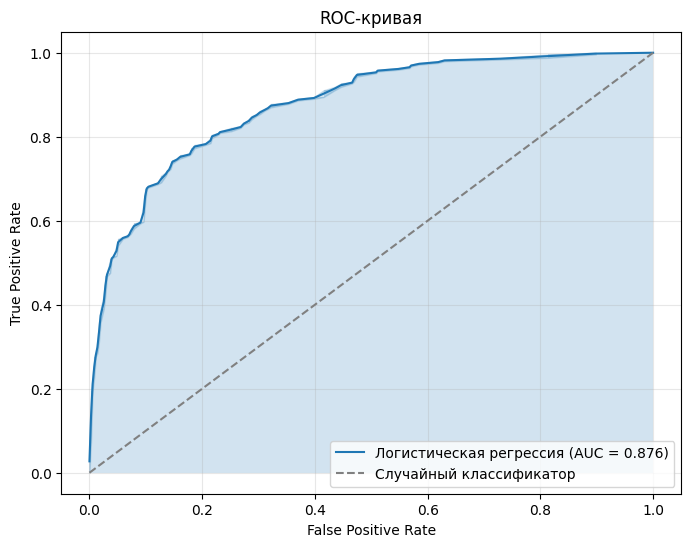

In [94]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'Логистическая регрессия (AUC = {roc_auc:.3f})')
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='gray', label='Случайный классификатор')
plt.fill_between(fpr, tpr, alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Сохраняем ROC-кривую
roc_curve_path = os.path.join(figures_dir, 'roc_curve_seaborn.png')
plt.savefig(roc_curve_path, dpi=300, bbox_inches='tight')
print(f"ROC-кривая сохранена в: {roc_curve_path}")
plt.show()

PR-кривая сохранена в: ./figures/pr_curve_seaborn.png


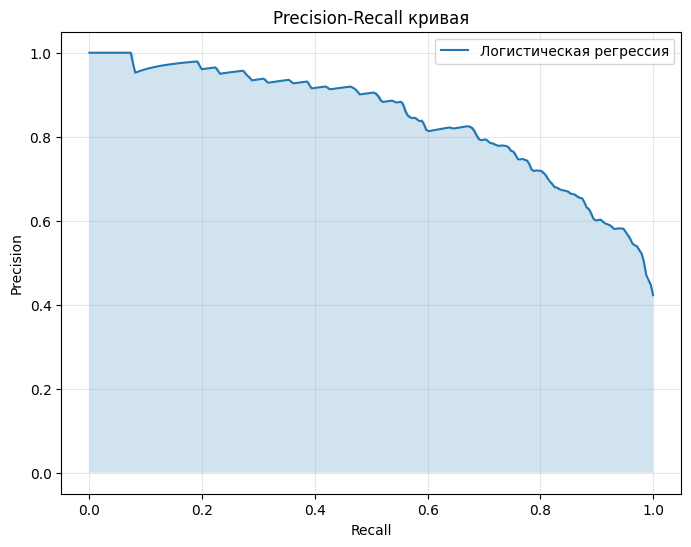

In [95]:
# Precision-Recall кривая
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
sns.lineplot(x=recall, y=precision, label='Логистическая регрессия')
plt.fill_between(recall, precision, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Сохраняем PR-кривую
pr_curve_path = os.path.join(figures_dir, 'pr_curve_seaborn.png')
plt.savefig(pr_curve_path, dpi=300, bbox_inches='tight')
print(f"PR-кривая сохранена в: {pr_curve_path}")
plt.show()


Матрица ошибок сохранена в: ./figures/confusion_matrix.png


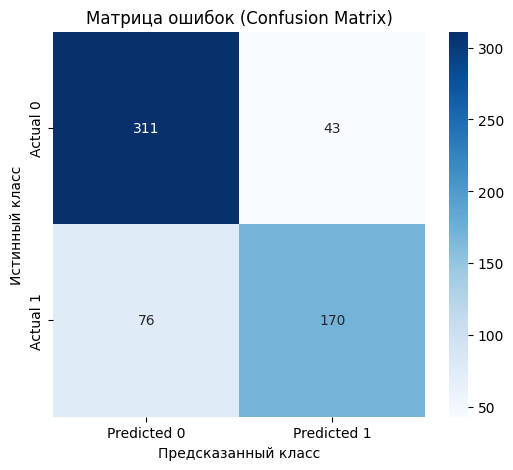

In [96]:
# Heatmap матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')

# Сохраняем матрицу ошибок
conf_matrix_path = os.path.join(figures_dir, 'confusion_matrix.png')
plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
print(f"Матрица ошибок сохранена в: {conf_matrix_path}")
plt.show()

In [97]:
comparison_data = {
    'Модель': ['DummyClassifier (бейзлайн)', 'LogisticRegression (лучшая)'],
    'Accuracy': [accuracy_baseline, accuracy],
    'ROC-AUC': [roc_auc_baseline, roc_auc],
    'Precision': [np.nan, precision],  # для бейзлайна нет осмысленного precision
    'Recall': [np.nan, recall],        # для бейзлайна нет осмысленного recall
    'F1-Score': [np.nan, f1]           # для бейзлайна нет осмысленного F1
}

comparison_df = pd.DataFrame(comparison_data)

In [98]:
comparison_df

,Модель,Accuracy,ROC-AUC,Precision,Recall,F1-Score
0,DummyClassifier (бейзлайн),0.590000,0.500000,NaN,NaN,NaN
1,LogisticRegression (лучшая),0.801667,0.876315,"[0.41, 0.41068447412353926, 0.411371237458194,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.740741


# Краткий отчёт по анализу моделей

### Сравнение качества моделей
Бейзлайн-модель (DummyClassifier) показала accuracy 59.00%, что соответствует простому предсказанию наиболее частого класса (отсутствие дефолта). Логистическая регрессия с оптимальными гиперпараметрами достигла accuracy 80.17%

### Влияние регуляризации
GridSearchCV выявил оптимальные параметры: C=0.1 с L1-регуляризацией. Это указывает на умеренную регуляризацию, которая эффективно борется с переобучением при сохранении хорошей предсказательной силы. L1-регуляризация (лассо) оказалась предпочтительнее L2, что говорит о наличии избыточных признаков — модель автоматически обнулила веса менее значимых переменных.

### Выводы и рекомендации

1. **Модель показала выдающееся качество** — ROC-AUC 0.877 на тестовой выборке превышает 0.861 с кросс-валидации, что свидетельствует об устойчивости и хорошей обобщающей способности. Такое значение ROC-AUC считается отличным результатом для кредитного скоринга

2. **Сбалансированность метрик** — Precision (79.8%) и Recall (69.1%) находятся в разумном соотношении: модель правильно идентифицирует 69% реальных дефолтов, при этом 80% её предупреждений о дефолте оказываются верными. Матрица ошибок показывает, что модель совершает меньше ошибок на классе 0 (ложные срабатывания), чем на классе 1 (пропущенные дефолты)

3. **Практическая применимость** — Улучшение accuracy на 21% относительно бейзлайна делает модель экономически оправданной для банка. Логистическая регрессия с L1-регуляризацией не только даёт высокую точность, но и обеспечивает интерпретируемость — можно анализировать важность признаков для принятия решений

**Рекомендация**: Данная модель готова для внедрения в систему кредитного скоринга. Для дальнейшего улучшения можно рассмотреть добавление новых признаков и тестирование на расширенной выборке клиентов